# Project: Visualizing Earnings Based On College Majors

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. 

## Dataset
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

## Purpose
Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
    * Using scatter plots
* How many majors are predominantly male? Predominantly female?
    * Using histograms
* Which category of majors have the most students?
    * Using bar plots

In [53]:
# Before we start creating data visualizations
# let's import the libraries we need and remove rows containing null values

import matplotlib.pyplot as plt
import pandas as pd

# To display plots inline
%matplotlib inline

In [8]:
# Read the dataset into a DataFrame
recent_grads=pd.read_csv("recent-grads.csv")

#start exploring the data
print(recent_grads.iloc[0])
print("\n")
print(recent_grads.head())
print("\n")
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


   Rank  

In [9]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [15]:
#number of rows in df
raw_data_count=recent_grads.shape[0]
print(raw_data_count)
recent_grads.dropna(inplace=True)
cleaned_data_count=recent_grads.shape[0]
print(cleaned_data_count)

172
172


## Pandas - Scatter Plots
Most of the plotting functionality in pandas is contained within the DataFrame.plot() method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the kind parameter to specify the type of plot we want. We use x and y to specify the data we want on each axis. We can read about the different parameters in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

If we run this code:

* recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

the scatter plot will be displayed immediately. This functionality is a byproduct of running the jupyter magic %matplotlib inline.

### Task
Generate scatter plots in separate jupyter notebook cells to explore the following relations:

* Sample_size and Median
* Sample_size and Unemployment_rate
* Full_time and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

Use the plots to explore the following questions:

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

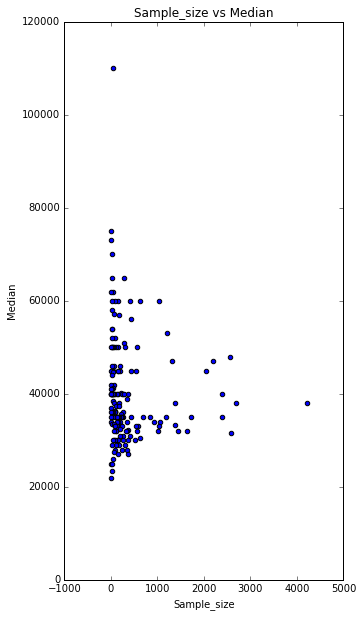

In [18]:
recent_grads.plot(x="Sample_size",y="Median",kind="scatter", title="Sample_size vs Median",figsize=(5,10))

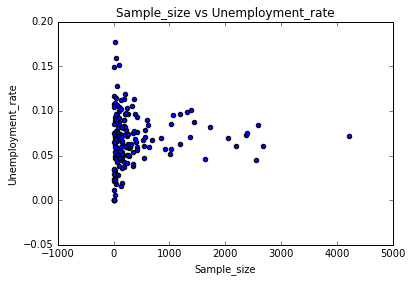

In [20]:
recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter", title="Sample_size vs Unemployment_rate")

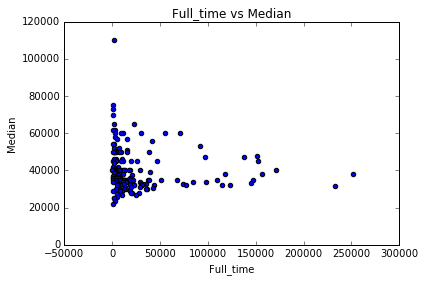

In [21]:
recent_grads.plot(x="Full_time",y="Median",kind="scatter", title="Full_time vs Median")

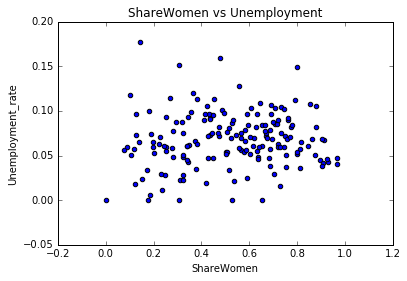

In [23]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate",kind="scatter", title="ShareWomen vs Unemployment")

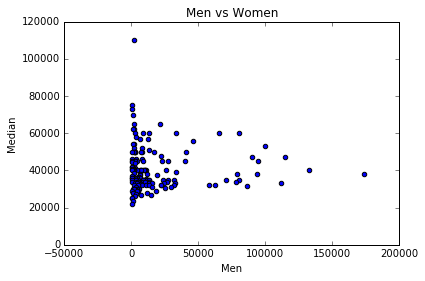

In [24]:
recent_grads.plot(x="Men", y="Median", kind="scatter", title="Men vs Women")

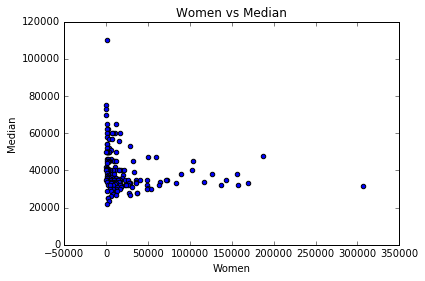

In [25]:
recent_grads.plot(x="Women", y="Median", kind="scatter", title="Women vs Median")

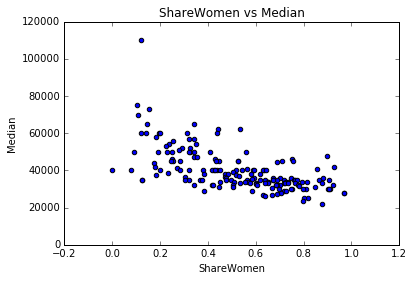

In [28]:
recent_grads.plot(x="ShareWomen", y="Median", kind="scatter", title="ShareWomen vs Median")

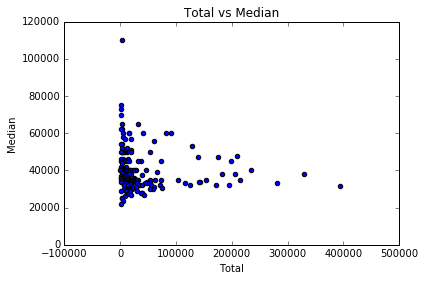

In [29]:
recent_grads.plot(x="Total", y="Median", kind="scatter", title="Total vs Median")

Do students in more popular majors make more money? no (see Total vs Median)

Do students that majored in subjects that were majority female make more money? no (see ShareWomen vs Median)

Is there any link between the number of full-time employees and median salary? no (see Full_time vs Median)

## Pandas, Histograms
To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(), and set the kind parameter to hist:

 * recent_grads['Sample_size'].plot(kind='hist')
 
The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. We use Series.plot() to plot a specific column and DataFrame.plot() to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

If you've looked at the documentation for Series.plot(), you'll notice there is no way to control the binning strategy for histograms. Luckily, we can control the binning strategy of a histogram using Series.hist(), which contains parameters specific to customizing histograms:

 * recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
 
### Task
Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, Women

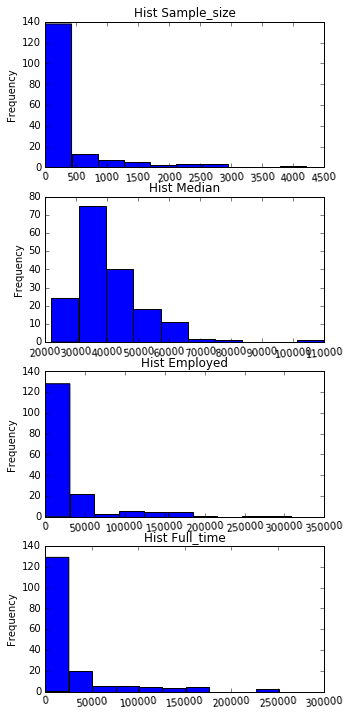

In [62]:
col= ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(0,4):
    ax = fig.add_subplot(4,1,r+1)
    ax = recent_grads[col[r]].plot(kind="hist", title="Hist "+col[r], rot=5)

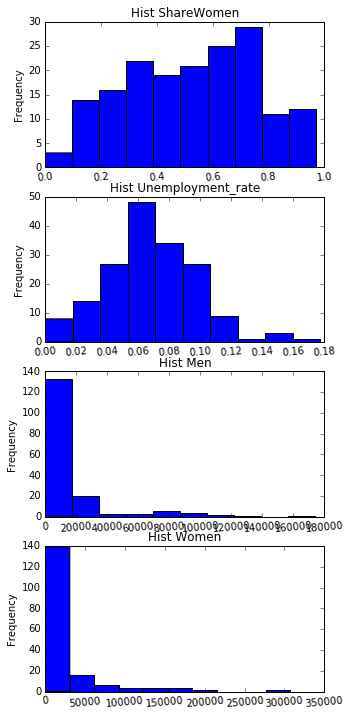

In [63]:
fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[col[r]].plot(kind="hist", title="Hist "+col[r], rot=5)

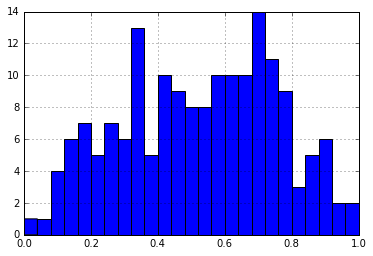

In [64]:
# 4 = ShareWomen
recent_grads[col[4]].hist(bins=25, range=(0,1))

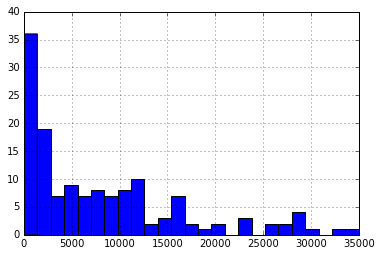

In [65]:
# 7 = Men
recent_grads[col[7]].hist(bins=25,range=(0,35000))

## Pandas, Scatter Matrix Plot
In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A **scatter matrix plot combines both scatter plots and histograms into one grid of plots** and allows us to explore potential relationships and distributions simultaneously.

A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.

* scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the figsize parameter).

If you want to read more about the parameters the function accepts, head to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd84103b908>,
      dtype=object)

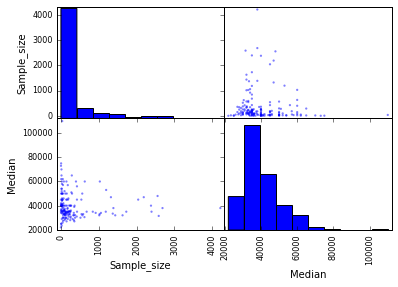

In [66]:
from pandas.plotting import scatter_matrix as sm

sm(recent_grads[["Sample_size","Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8409d4da0>,
      dtype=object)

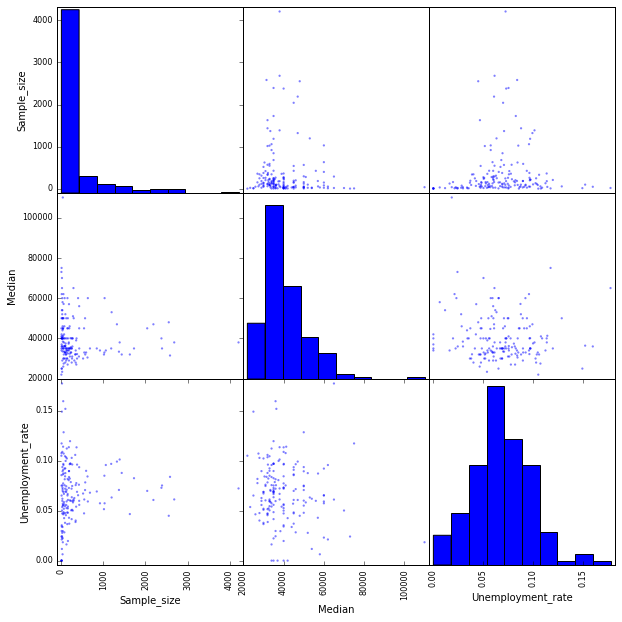

In [67]:
sm(recent_grads[["Sample_size","Median","Unemployment_rate"]],figsize=(10,10))

Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

* Do students in more popular majors make more money? no (see Total vs Median)

* Do students that majored in subjects that were majority female make more money? no (see ShareWomen vs Median)

* Is there any link between the number of full-time employees and median salary? no (see Full_time vs Median)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8406b0a20>,
      dtype=object)

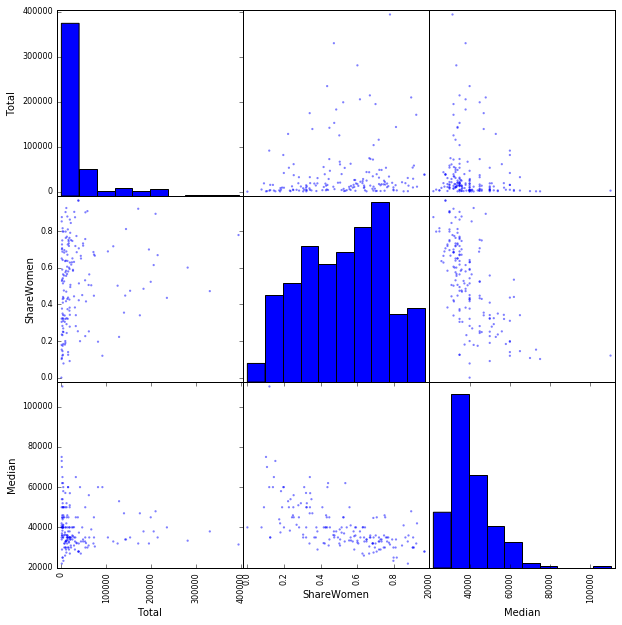

In [69]:
sm(recent_grads[["Total","ShareWomen","Median"]],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd84083a4e0>,
      dtype=object)

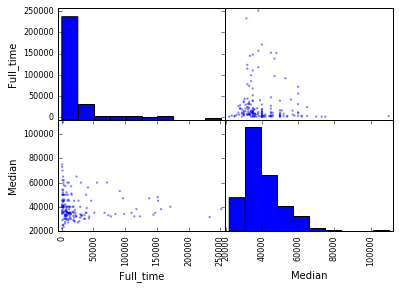

In [68]:
sm(recent_grads[["Full_time","Median"]])

## Pandas, Bar Plots
To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column:

* recent_grads[:5]['Women'].plot(kind='bar')

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

* recent_grads[:5].plot.bar(x='Major', y='Women')

### Tasks
* Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.
* Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

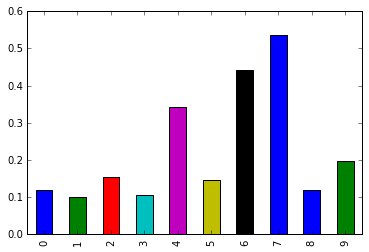

In [70]:
recent_grads[:10]["ShareWomen"].plot(kind="bar")

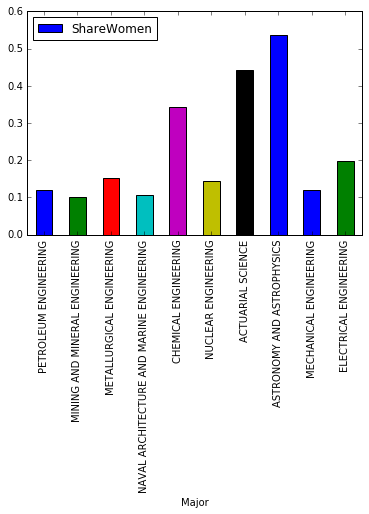

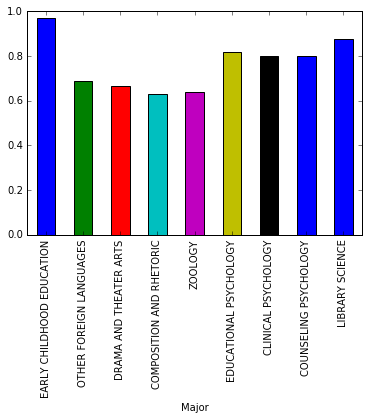

In [73]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

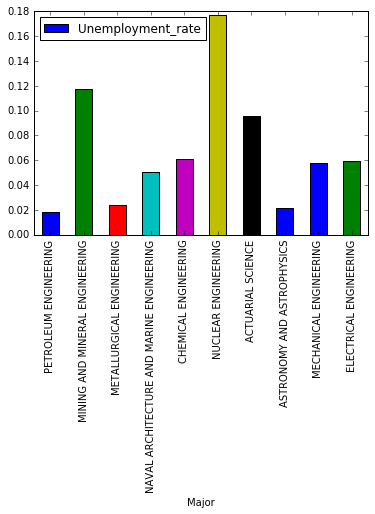

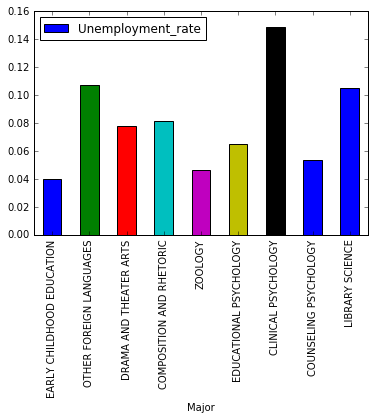

In [75]:
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate")
recent_grads[163:].plot.bar(x="Major", y="Unemployment_rate")

## Conclusion

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation on [plotting in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), you'll notice that there's built in support for many more plots.

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
Use a box plot to explore the distributions of median salaries and unemployment rate.
Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.